<a href="https://colab.research.google.com/github/SeoyoungOhMe/BiometricsSecurity/blob/main/hw2_face_detection_2171070_%EC%98%A4%EC%84%9C%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection Íµ¨ÌòÑÌïòÍ∏∞

In [ ]:
!pip install dlib
!pip install face_recognition

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 100.1/100.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=74eff5818280cfe6dd8c7ec100ab514c4d6cce8aa2c10f7c026afa526de5765b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install numpy
!pip install opencv-python
!pip install pandas

### Í≥ºÏ†ú1 Ï†úÏ∂ú ÏÇ¨ÏßÑ ÏóÖÎ°úÎìú

In [ ]:
from google.colab import files

# ÌååÏùº ÏóÖÎ°úÎìúÌïòÍ∏∞
uploaded = files.upload()

# ÏóÖÎ°úÎìúÌïú ÌååÏùº ÌôïÏù∏ÌïòÍ∏∞
for filename in uploaded.keys():
    print('ÏóÖÎ°úÎìúÎêú ÌååÏùº "{name}" Í∏∏Ïù¥: {length} Î∞îÏù¥Ìä∏'.format(
        name=filename, length=len(uploaded[filename])))

Saving osy_1.jpg to osy_1.jpg
ÏóÖÎ°úÎìúÎêú ÌååÏùº "osy_1.jpg" Í∏∏Ïù¥: 153623 Î∞îÏù¥Ìä∏


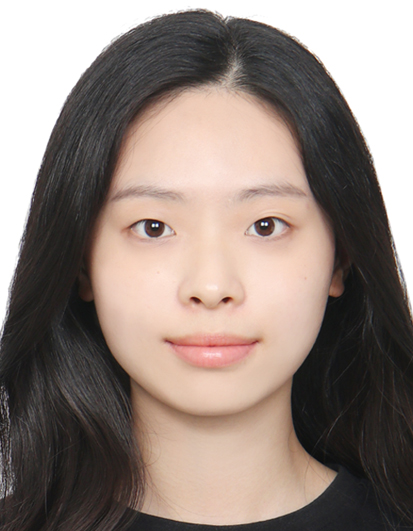

In [ ]:
# ÏÇ¨ÏßÑ Ï∂úÎ†•
from IPython.display import Image, display

# ÏóÖÎ°úÎìúÎêú ÌååÏùºÎì§ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï¥ÏÑú Ï∂úÎ†•
for filename in uploaded.keys():
    display(Image(filename))

### ÏñºÍµ¥ ÏòÅÏó≠ Î∂ÑÌï†ÌïòÍ∏∞ => ÏñºÍµ¥ ÏòÅÏó≠ binary mask Ïù¥ÎØ∏ÏßÄ

In [ ]:
import numpy as np # mat cal
import pandas as pd # excel, table
import cv2 # opencv
import matplotlib.pyplot as plt # import matplotlib as mpl
import dlib

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = cv2.imread('osy_1.jpg')  # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÏóê ÎßûÍ≤å Ï°∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# BGRÏóêÏÑú RGBÎ°ú Î≥ÄÌôò
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# BGRÏóêÏÑú HSVÎ°ú ÏÉâÏÉÅ Í≥µÍ∞Ñ Î≥ÄÌôò
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
# ÏñºÍµ¥(ÌîºÎ∂Ä) ÏÉâÏÉÅÏóê ÎåÄÌïú HSV Î≤îÏúÑ Ï†ïÏùò
# Ïù¥ Í∞íÏùÄ Ï°∞Î™Ö Î∞è ÌîºÎ∂ÄÏÉâÏóê Îî∞Îùº Ï°∞Ï†ïÎê† ÌïÑÏöîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
lower_skin = np.array([0, 48, 80], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

In [ ]:
# HSV Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï†ïÏùòÎêú Î≤îÏúÑÏóê Ìï¥ÎãπÌïòÎäî ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
mask = cv2.inRange(image_hsv, lower_skin, upper_skin)

In [ ]:
# ÎßàÏä§ÌÅ¨ Ï†ïÏ†úÎ•º ÏúÑÌïú Î™®Ìè¥Î°úÏßÄ Ïó∞ÏÇ∞ Ï†ÅÏö©
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)

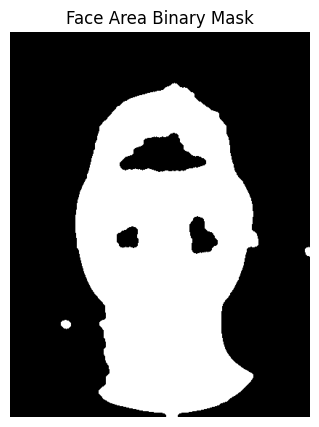

In [ ]:
# Í≤∞Í≥º ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÎòêÎäî ÌëúÏãú
cv2.imwrite('face_mask.jpg', mask_cleaned)  # Í≤∞Í≥º ÌååÏùº Ï†ÄÏû•

# Í≤∞Í≥º ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄÎ•º matplotlibÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌëúÏãú
plt.figure(figsize=(5, 5))  # ÌëúÏãúÌï† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
plt.imshow(mask_cleaned, cmap='gray')  # cmap='gray'Îäî Í∑∏Î†àÏù¥Ïä§ÏºÄÏùº Ïù¥ÎØ∏ÏßÄÎ°ú ÌëúÏãúÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
plt.title('Face Area Binary Mask')  # Ïù¥ÎØ∏ÏßÄ Ï†úÎ™©ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
plt.axis('off')  # Ï∂ï Ï†ïÎ≥¥ ÎÅÑÍ∏∞
plt.show()  # Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï©ÎãàÎã§.

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú ÏñªÍ∏∞

ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ

In [ ]:
img_bgr = cv2.imread('osy_1.jpg')
w = img_bgr.shape[1]

fx = 640 / w
fy = fx

img_bgr = cv2.resize(img_bgr, None, fx=fx, fy=fy)

In [ ]:
detector_hog = dlib.get_frontal_face_detector() # detector ÏÑ†Ïñ∏

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of img pyramid)

In [ ]:
l = t = r = b = 0

for dlib_rect in dlib_rects:
  l, t = dlib_rect.left(), dlib_rect.top()
  r, b = dlib_rect.right(), dlib_rect.bottom()

  print("ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú")
  print(f"l : {l}, t : {t}, r : {r}, b : {b}")

ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú
l : 118, t : 247, r : 504, b : 632


Binary mask Ïù¥ÎØ∏ÏßÄ

In [ ]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = cv2.imread('face_mask.jpg')  # ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ Î°úÎìú
# BGRÏóêÏÑú GRAYÎ°ú Î≥ÄÌôò
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Ïú§Í≥Ω Ï∞æÍ∏∞
contours, _ = cv2.findContours(image_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ïú§Í≥Ω Ï§ëÏóêÏÑú Í∞ÄÏû• ÌÅ∞ Í≤ÉÏùÑ Ï∞æÍ≥† Î∞îÏö¥Îî© Î∞ïÏä§ Í≥ÑÏÇ∞

largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

print("Binary mask Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú")
print(f"l : {x}, t : {y}, r : {w}, b : {h}")

Binary mask Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú
l : 88, t : 64, r : 256, b : 467


### ÏñºÍµ¥Ïùò detected bbox Î∞ïÏä§Î•º cv2.rectangle() ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄÏóê Í∑∏Î¶¨Í∏∞

ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ

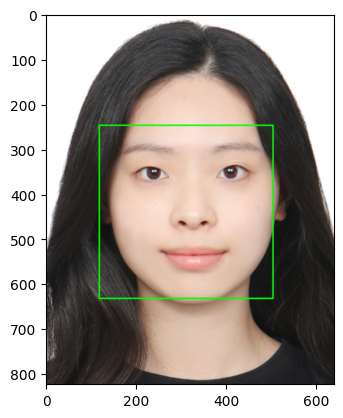

In [ ]:
cv2.rectangle(img_rgb, (l,t), (r,b), # Ï¢å ÏÉÅÎã®, Ïö∞ ÌïòÎã®
									(0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb)
plt.show()

Binary mask Ïù¥ÎØ∏ÏßÄ

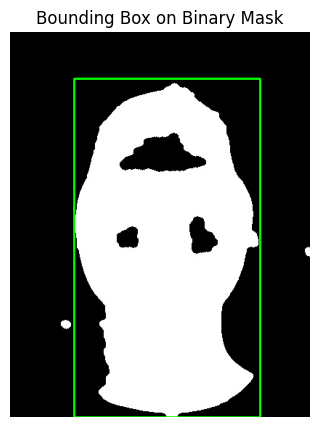

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box on Binary Mask')
plt.axis('off')
plt.show()

## 4Ï£ºÏ∞®Ïóê Î∞∞Ïö¥ Face DetectionÍ≥º Face Recognition ÏßÅÏ†ë Ïã§ÌñâÌïòÍ∏∞

### ÏÇ¨ÏßÑ Îçî ÏóÖÎ°úÎìú

In [ ]:
from google.colab import files

# ÌååÏùº ÏóÖÎ°úÎìúÌïòÍ∏∞
uploaded = files.upload()

# ÏóÖÎ°úÎìúÌïú ÌååÏùº ÌôïÏù∏ÌïòÍ∏∞
for filename in uploaded.keys():
    print('ÏóÖÎ°úÎìúÎêú ÌååÏùº "{name}" Í∏∏Ïù¥: {length} Î∞îÏù¥Ìä∏'.format(
        name=filename, length=len(uploaded[filename])))

Saving osy_3.jpg to osy_3 (1).jpg
ÏóÖÎ°úÎìúÎêú ÌååÏùº "osy_3 (1).jpg" Í∏∏Ïù¥: 1246029 Î∞îÏù¥Ìä∏


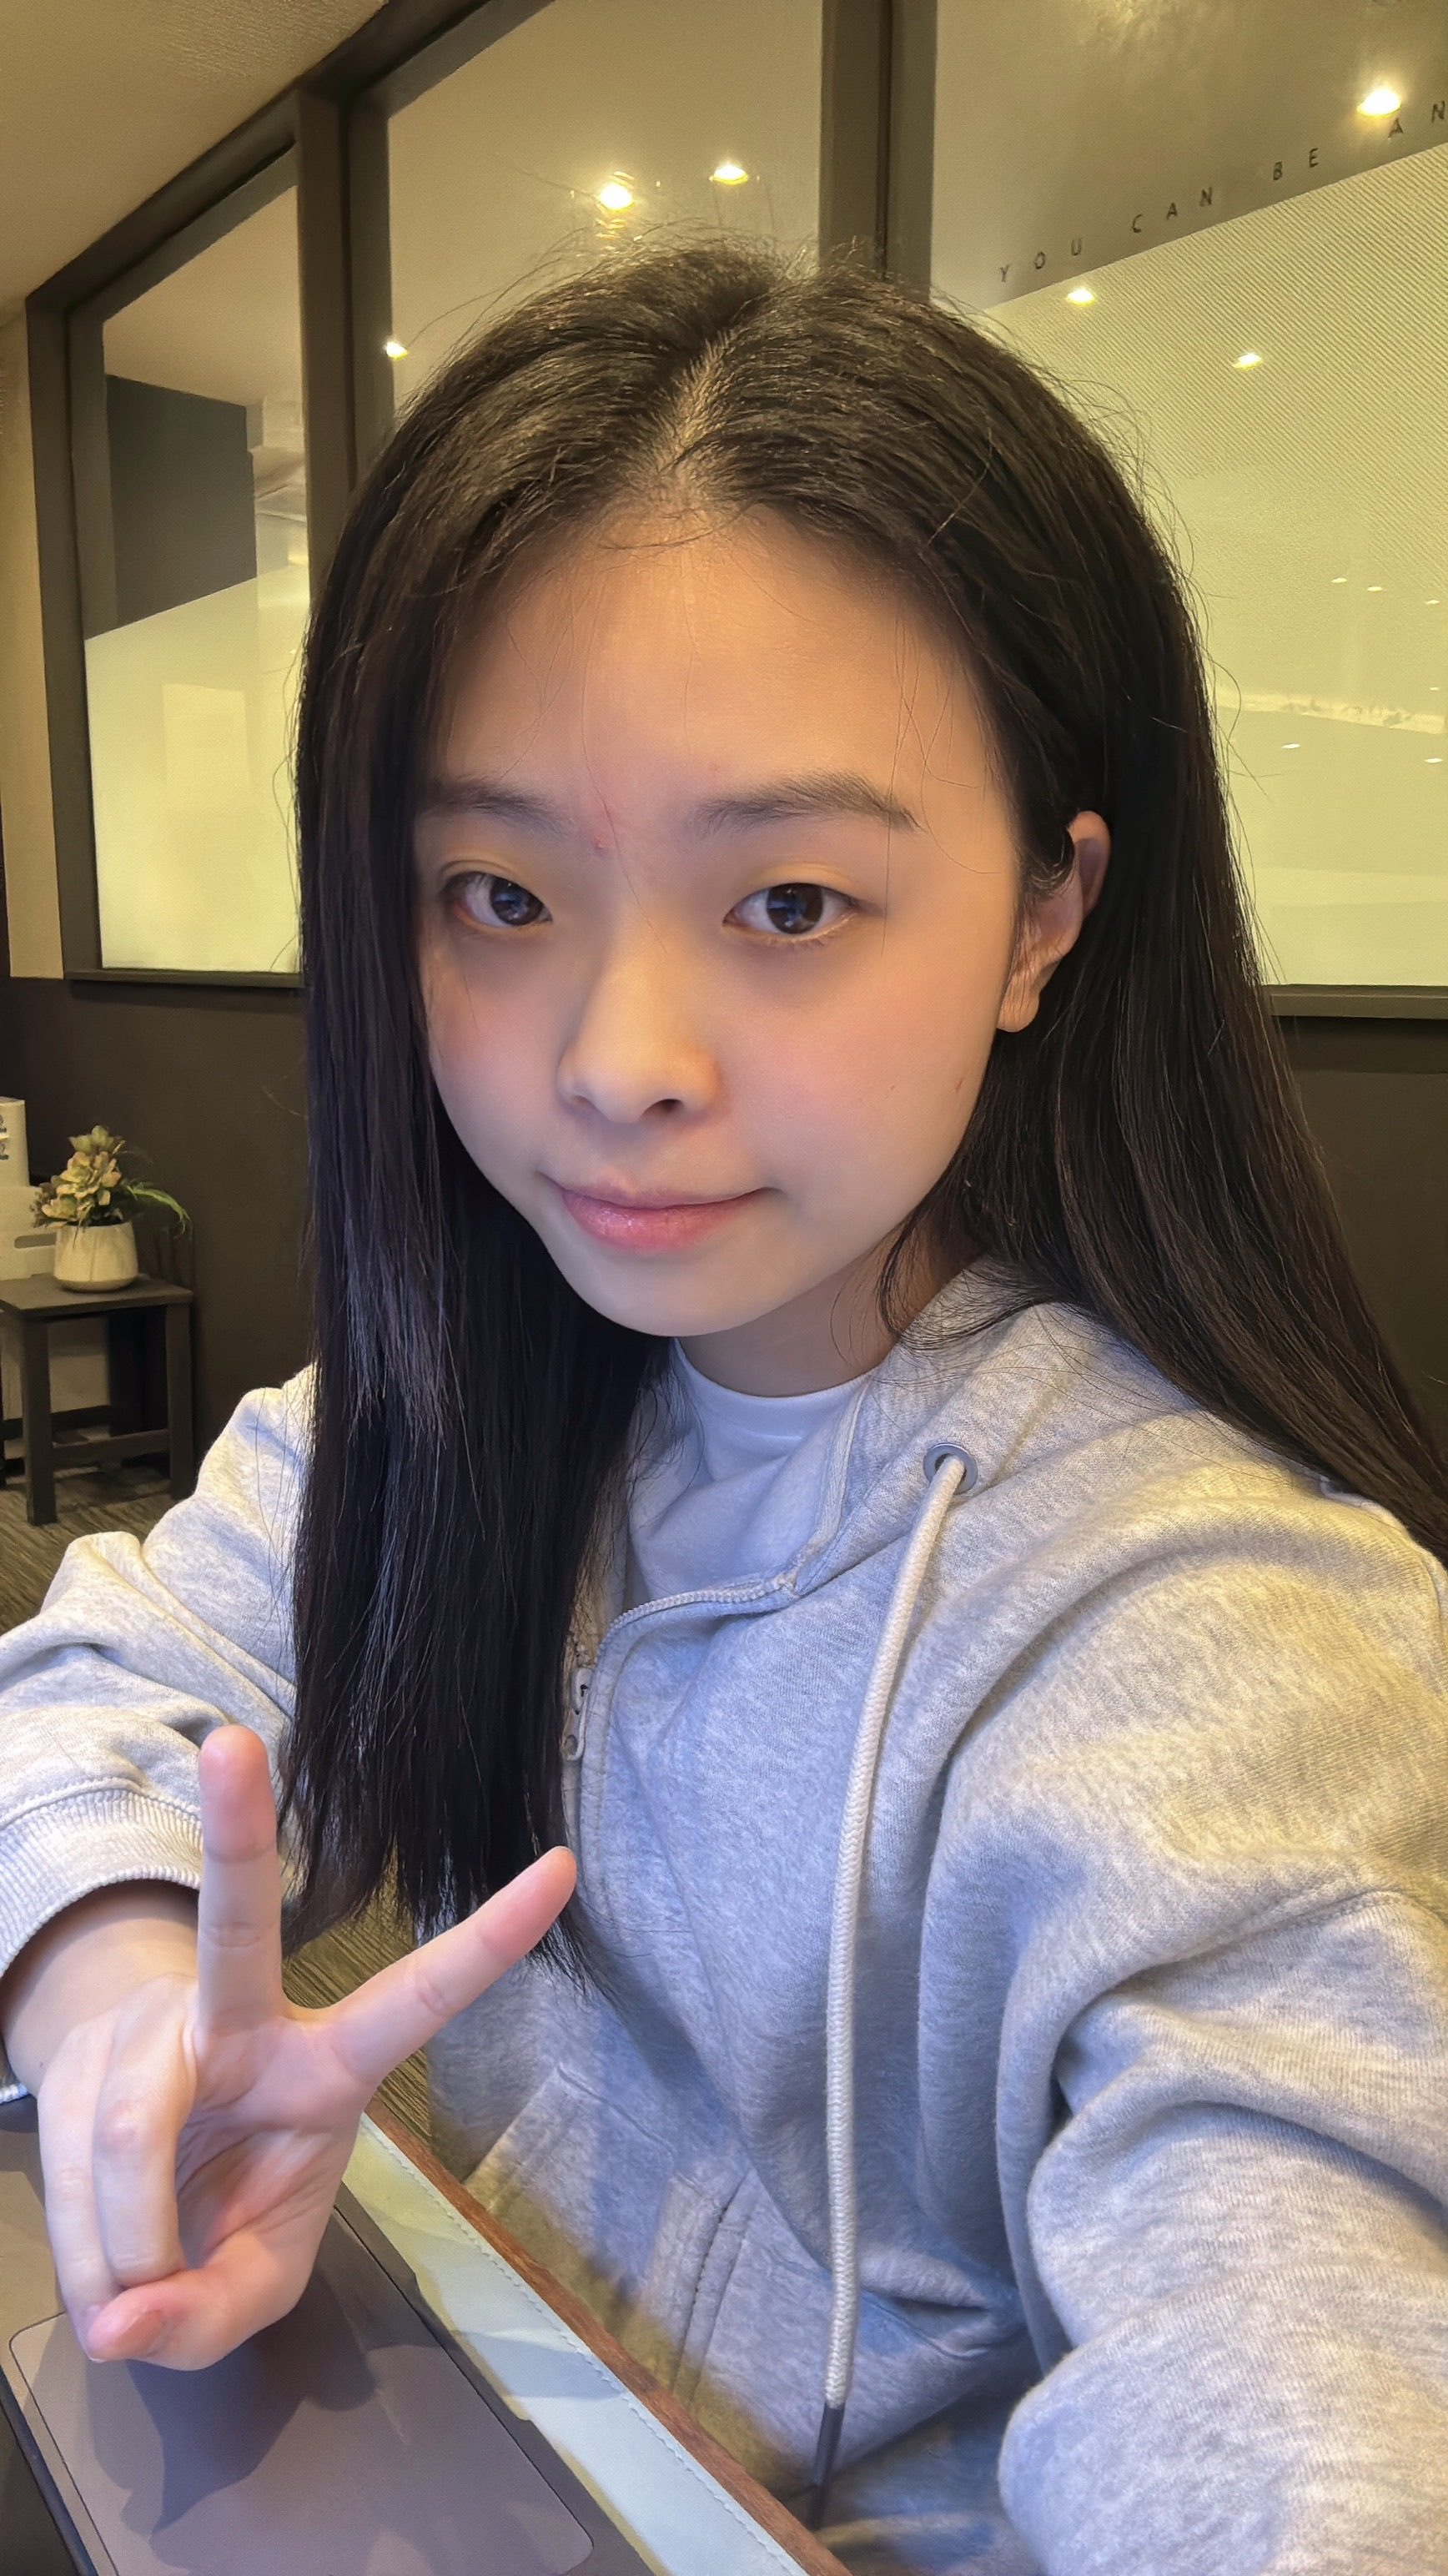

In [ ]:
# ÏÇ¨ÏßÑ Ï∂úÎ†•
from IPython.display import Image, display

# ÏóÖÎ°úÎìúÎêú ÌååÏùºÎì§ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï¥ÏÑú Ï∂úÎ†•
for filename in uploaded.keys():
    display(Image(filename))

### dlibÎ°ú face recognition ÌõÑ Îëê ÏÇ¨ÏßÑÏùò ÏûÑÎ≤†Îî© Í∞í ÎπÑÍµê

In [ ]:
!pip install face-recognition

In [ ]:
import face_recognition
import time

In [ ]:
import dlib
from scipy.spatial import distance

In [ ]:
# dlib HOG detector Ï¥àÍ∏∞Ìôî
detector_hog = dlib.get_frontal_face_detector()

In [ ]:
def calculate_similarity(img_path1, img_path2):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è RGBÎ°ú Î≥ÄÌôò
    img_bgr_1 = cv2.imread(img_path1)
    img_rgb_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2RGB)

    img_bgr_2 = cv2.imread(img_path2)
    img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)

    # dlibÏùÑ Ïù¥Ïö©Ìïú ÏñºÍµ¥ Í≤ÄÏ∂ú
    dlib_rects_1 = detector_hog(img_rgb_1, 1)
    dlib_rects_2 = detector_hog(img_rgb_2, 1)

    # Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò Ï≤´ Î≤àÏß∏ Í≤ÄÏ∂úÎêú ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú
    for dlib_rect in dlib_rects_1:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        cv2.rectangle(img_rgb_1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        print(f"Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : {l}, t : {t}, r : {r}, b : {b}")

    # Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò Ï≤´ Î≤àÏß∏ Í≤ÄÏ∂úÎêú ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú
    for dlib_rect in dlib_rects_2:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        cv2.rectangle(img_rgb_2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        print(f"Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : {l}, t : {t}, r : {r}, b : {b}")

     # face-recognitionÏùÑ Ïù¥Ïö©Ìïú ÏñºÍµ¥ ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
    face_locations_1 = face_recognition.face_locations(img_rgb_1)
    face_locations_2 = face_recognition.face_locations(img_rgb_2)

    face_encodings_1 = face_recognition.face_encodings(img_rgb_1, face_locations_1)
    face_encodings_2 = face_recognition.face_encodings(img_rgb_2, face_locations_2)

    # Ï≤´ Î≤àÏß∏ ÏñºÍµ¥Ïùò ÏûÑÎ≤†Îî©
    face_encoding_1 = face_encodings_1[0]
    # Îëê Î≤àÏß∏ ÏñºÍµ¥Ïùò ÏûÑÎ≤†Îî©
    face_encoding_2 = face_encodings_2[0]

    # L2 Norm (Euclidean distance) Í≥ÑÏÇ∞
    euclidean_dist = np.linalg.norm(face_encoding_1 - face_encoding_2)

    # Cosine Similarity Í≥ÑÏÇ∞

    # Normalized vectors for Cosine Similarity
    normalized_face_encoding_1 = face_encoding_1 / np.linalg.norm(face_encoding_1)
    normalized_face_encoding_2 = face_encoding_2 / np.linalg.norm(face_encoding_2)

    cos_sim = np.dot(normalized_face_encoding_1, normalized_face_encoding_2)

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb_1)
    plt.title('Image 1')

    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb_2)
    plt.title('Image 2')

    plt.show()

    return img_rgb_1, img_rgb_2, euclidean_dist, cos_sim


Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : 82, t : 142, r : 349, b : 409
Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : 425, t : 781, r : 1224, b : 1579


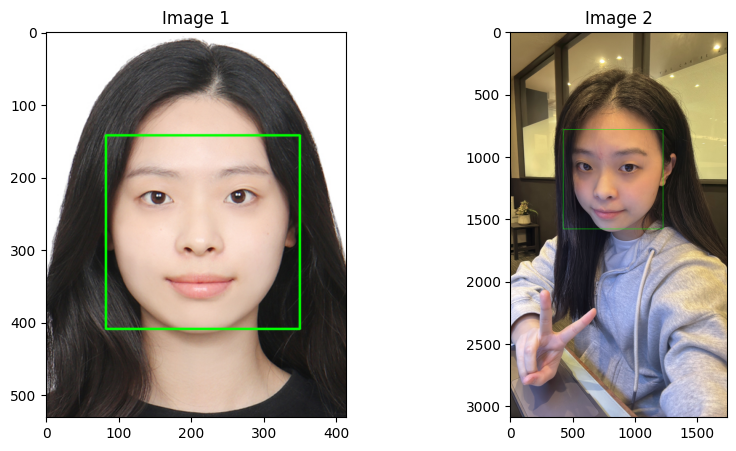

Euclidean distance : 0.3763183442995933
Time : 3.361701965332031e-05


In [ ]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
img_path1 = 'osy_1.jpg'
img_path2 = 'osy_3.jpg'

# Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ Î∞è Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
img_rgb_1, img_rgb_2, euclidean_dist, cos_sim = calculate_similarity(img_path1, img_path2)

# dlib detector Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ï
start_time = time.time()
end_time = time.time()
dlib_execution_time = end_time - start_time

# Í∞í Ï∂úÎ†•
print(f"Euclidean distance : {euclidean_dist}")
# print(cos_sim)
print(f"Time : {dlib_execution_time}")

- Ï≤´ Î≤àÏß∏ ÏÇ¨ÏßÑÏùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú => l : 82, t : 142, r : 349, b : 409
- Îëê Î≤àÏß∏ ÏÇ¨ÏßÑÏùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú => l : 425, t : 781, r : 1224, b : 1579   
=> Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Ï¢åÌëúÍ∞Ä ÎπÑÏä∑ÌïòÏßÄ ÏïäÎã§.

- normalized vector Í∏∞Ï§ÄÏùò cos distance : 0.3763183442995933    
=> cos Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÎã§.

### ÏßÅÏ†ë Íµ¨ÌòÑÌïú color segmentation mask Í∏∞Î∞òÏùò detector Î°ú ÏàòÏ†ï

In [ ]:
# HSV ÏÉâÏÉÅ Î≤îÏúÑ
lower_hsv = np.array([0, 40, 70])
upper_hsv = np.array([25, 255, 255])

In [ ]:
def color_segmentation_detector(image):
    # Ïù¥ÎØ∏ÏßÄÎ•º HSVÎ°ú Î≥ÄÌôò
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # HSV ÏÉâÏÉÅ Í≥µÍ∞ÑÏóêÏÑú ÌîºÎ∂ÄÏÉâÏóê Ìï¥ÎãπÌïòÎäî ÏòÅÏó≠ Ï∞æÍ∏∞
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    # Î™®Ìè¥Î°úÏßÄ Ïó∞ÏÇ∞ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    mask = cv2.dilate(mask, np.ones((3,3), np.uint8), iterations=1)
    # Ïú§Í≥ΩÏÑ† Ï∞æÍ∏∞
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Í∞ÄÏû• ÌÅ∞ ÏòÅÏó≠Ïùò ÏÇ¨Í∞ÅÌòï Í≤ΩÍ≥Ñ ÏÉÅÏûê Ï∞æÍ∏∞
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    return [(y, x+w, y+h, x)]


In [ ]:
def calculate_similarity(img_path1, img_path2):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è RGBÎ°ú Î≥ÄÌôò
    img_bgr_1 = cv2.imread(img_path1)
    img_rgb_1 = cv2.cvtColor(img_bgr_1, cv2.COLOR_BGR2RGB)

    img_bgr_2 = cv2.imread(img_path2)
    img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)

    # ÏÉâÏÉÅ Î∂ÑÌï† Í∏∞Î∞òÏùò ÏñºÍµ¥ Í≤ÄÏ∂ú
    face_locations_1 = color_segmentation_detector(img_rgb_1)
    face_locations_2 = color_segmentation_detector(img_rgb_2)

    # Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú
    for top, right, bottom, left in face_locations_1:
        cv2.rectangle(img_rgb_1, (left, top), (right, bottom), (0, 255, 0), 2)
        print(f"Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : {left}, t : {top}, r : {right}, b : {bottom}")

    # Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú
    for top, right, bottom, left in face_locations_2:
        cv2.rectangle(img_rgb_2, (left, top), (right, bottom), (0, 255, 0), 2)
        print(f"Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : {left}, t : {top}, r : {right}, b : {bottom}")

    # face-recognitionÏùÑ Ïù¥Ïö©Ìïú ÏñºÍµ¥ ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
    face_encodings_1 = face_recognition.face_encodings(img_rgb_1, face_locations_1)
    face_encodings_2 = face_recognition.face_encodings(img_rgb_2, face_locations_2)

    # ÏñºÍµ¥Ïù¥ ÌïòÎÇòÎèÑ Í≤ÄÏ∂úÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ Ï≤òÎ¶¨
    if not face_encodings_1 or not face_encodings_2:
        return None, None, None

    # Ï≤´ Î≤àÏß∏ ÏñºÍµ¥Ïùò ÏûÑÎ≤†Îî©
    face_encoding_1 = face_encodings_1[0]
    # Îëê Î≤àÏß∏ ÏñºÍµ¥Ïùò ÏûÑÎ≤†Îî©
    face_encoding_2 = face_encodings_2[0]

    # L2 Norm (Euclidean distance) Í≥ÑÏÇ∞
    euclidean_dist = np.linalg.norm(face_encoding_1 - face_encoding_2)

    # Cosine Similarity Í≥ÑÏÇ∞

    # Normalized vectors for Cosine Similarity
    normalized_face_encoding_1 = face_encoding_1 / np.linalg.norm(face_encoding_1)
    normalized_face_encoding_2 = face_encoding_2 / np.linalg.norm(face_encoding_2)

    cos_sim = np.dot(normalized_face_encoding_1, normalized_face_encoding_2)

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb_1)
    plt.title('Image 1')

    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb_2)
    plt.title('Image 2')

    plt.show()

    return img_rgb_1, img_rgb_2, euclidean_dist, cos_sim


Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : 88, t : 75, r : 344, b : 527
Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏùò bounding box Ï¢åÌëú => l : 426, t : 0, r : 1736, b : 1657


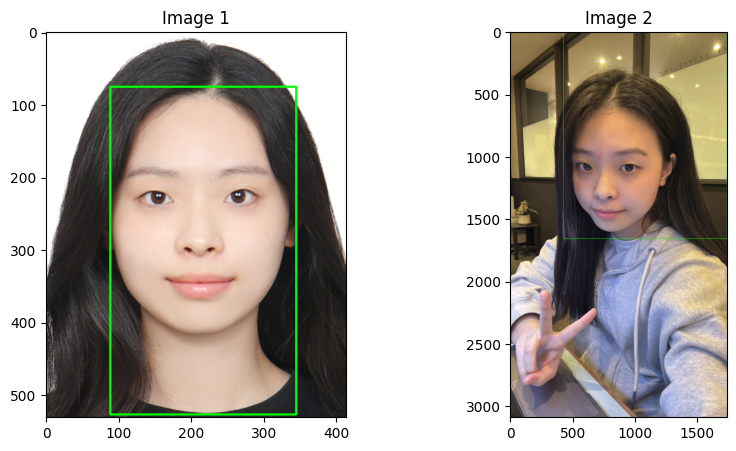

Euclidean distance : 0.717329733867725
Time : 3.2901763916015625e-05


In [ ]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
img_path1 = 'osy_1.jpg'
img_path2 = 'osy_3.jpg'

# Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ Î∞è Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
img_rgb_1, img_rgb_2, euclidean_dist, cos_sim = calculate_similarity(img_path1, img_path2)

# Color segmentation mask detector Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ï
start_time = time.time()
end_time = time.time()
color_segmentation_execution_time = end_time - start_time

# Í∞í Ï∂úÎ†•
print(f"Euclidean distance : {euclidean_dist}")
# print(cos_sim)
print(f"Time : {color_segmentation_execution_time}")

- Ï≤´ Î≤àÏß∏ ÏÇ¨ÏßÑÏùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú => l : 88, t : 75, r : 344, b : 527   

- Îëê Î≤àÏß∏ ÏÇ¨ÏßÑÏùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú => l : 426, t : 0, r : 1736, b : 1657   
=> Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Ï¢åÌëúÍ∞Ä ÎπÑÏä∑ÌïòÏßÄ ÏïäÎã§.

- normalized vector Í∏∞Ï§ÄÏùò cos distance : 0.717329733867725   
=> cos Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§.

- cos distance Í∞Ä 0.3763183442995933, 0.717329733867725 Î°ú Îëò Í∞Ñ Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§.
- cos distance(similarity)Îäî 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≤°ÌÑ∞Í∞Ä Ïú†ÏÇ¨Ìï®ÏùÑ ÏùòÎØ∏ÌïúÎã§.   
=> Îî∞ÎùºÏÑú ÏßÅÏ†ë Íµ¨ÌòÑÌïú color segmentation mask Í∏∞Î∞òÏùò detectorÏùò Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

### Ïã§Ìñâ ÏãúÍ∞Ñ ÎπÑÍµê

In [ ]:
# Ïã§Ìñâ ÏãúÍ∞Ñ Ï∂úÎ†•
print("Dlib detector execution time:", dlib_execution_time)
print("Color segmentation mask detector execution time:", color_segmentation_execution_time)

Dlib detector execution time: 3.361701965332031e-05
Color segmentation mask detector execution time: 3.2901763916015625e-05


- Dlib detector Ïã§Ìñâ ÏãúÍ∞Ñ : 3.361701965332031e-05
- Color segmentation mask detector Ïã§Ìñâ ÏãúÍ∞Ñ : 3.2901763916015625e-05

=> Ïã§Ìñâ ÏãúÍ∞ÑÏóêÎäî ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥ Î≥¥Ïù∏Îã§.

## Îã§Î•∏ Face Recognition Î∞©Î≤ï Ï†ÅÏö©ÌïòÍ∏∞
1. 4Ï£ºÏ∞®ÏóêÏÑú Îã§Î£¨ dlib Í∏∞Î∞òÏùò face recognition Ïù¥Ïô∏ Îã§Î•∏ Ïò§ÌîàÏÜåÏä§ face recognition Ï†ÅÏö©ÌïòÍ∏∞
2. dlib ÎåÄÎπÑ Ï†ïÌôïÎèÑÏôÄ Ïã§ÌñâÏÜçÎèÑ ÏñºÎßàÎÇò Ï¢ãÏïÑÏ°åÎäîÏßÄ Î≥¥Í≥†ÏÑúÏóê ÏûëÏÑ±ÌïòÍ∏∞

Ref : https://github.com/serengil/deepface

In [ ]:
!pip install deepface

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.3/94.3 kB 3.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 MB 17.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 88.4/88.4 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80.2/80.2 kB 12.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=757e5e3a5f633730ca0a80cfb9366525843db7c3aafb727d0a71f9925478877c
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
# import cv2
from deepface import DeepFace
# import time
# import numpy as np

24-04-05 08:27:19 - Directory /root/.deepface created
24-04-05 08:27:19 - Directory /root/.deepface/weights created


In [ ]:
# Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
img_path1 = 'osy_1.jpg'
img_path2 = 'osy_3.jpg'

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú
img_rgb_1 = cv2.cvtColor(cv2.imread(img_path1), cv2.COLOR_BGR2RGB)
img_rgb_2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB)

In [ ]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
  "GhostFaceNet",
]

In [ ]:
# Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ï ÏãúÏûë
start_time = time.time()

#face recognition
dfs1 = DeepFace.find(img_path = "osy_1.jpg", db_path = "/content", model_name = models[9])
dfs2 = DeepFace.find(img_path = "osy_3.jpg", db_path = "/content", model_name = models[9])

24-04-05 08:28:11 - Pre-trained weights is downloaded from https://github.com/HamadYA/GhostFaceNets/releases/download/v1.2/GhostFaceNet_W1.3_S1_ArcFace.h5 to /root/.deepface/weights/ghostfacenet_v1.h5


Downloading...
From: https://github.com/HamadYA/GhostFaceNets/releases/download/v1.2/GhostFaceNet_W1.3_S1_ArcFace.h5
To: /root/.deepface/weights/ghostfacenet_v1.h5
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17.3M/17.3M [00:00<00:00, 53.0MB/s]


24-04-05 08:28:12 - Pre-trained weights is just downloaded to /root/.deepface/weights/ghostfacenet_v1.h5
24-04-05 08:28:12 - Found 3 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:00<00:00,  8.87it/s]

24-04-05 08:28:12 - üî¥ Exception while extracting faces from /content/face_mask.jpg: Face could not be detected in /content/face_mask.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:06<00:00,  2.14s/it]


24-04-05 08:28:19 - There are now 4 representations in ds_ghostfacenet_opencv_v2.pkl
24-04-05 08:28:19 - Searching osy_1.jpg in 4 length datastore
24-04-05 08:28:19 - find function duration 11.897130966186523 seconds
24-04-05 08:28:19 - Searching osy_3.jpg in 4 length datastore
24-04-05 08:28:23 - find function duration 3.5778064727783203 seconds


In [ ]:
#embeddings
embedding1 = DeepFace.represent(img_path = img_path1, model_name = models[9]
)
embedding2 = DeepFace.represent(img_path = img_path2, model_name = models[9]
)

In [ ]:
print(type(embedding1))

<class 'list'>


In [ ]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
result = DeepFace.verify(img1_path = img_path1,
          img2_path = img_path2,
          distance_metric = metrics[2]
)

print(result)

ratio = result['distance']/result['threshold']
print(f"distance/threshold : {ratio}")

# Ïã§Ìñâ ÏãúÍ∞Ñ Ï∏°Ï†ï Ï¢ÖÎ£å
end_time = time.time()
execution_time = end_time - start_time
print(f"Time : {execution_time}")

24-04-05 08:28:28 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 580M/580M [00:04<00:00, 133MB/s]


{'verified': True, 'distance': 1.008027414491453, 'threshold': 1.17, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2', 'facial_areas': {'img1': {'x': 65, 'y': 118, 'w': 292, 'h': 292, 'left_eye': (148, 227), 'right_eye': (266, 225)}, 'img2': {'x': 359, 'y': 727, 'w': 908, 'h': 908, 'left_eye': (595, 1079), 'right_eye': (940, 1087)}}, 'time': 11.71}
distance/threshold : 0.8615618927277376
Time : 32.34171938896179


- dlibÏùò cos distance : 0.3763183442995933
- deepfaceÏùò cos distance : 0.8615618927277376   
=> deepfaceÏùò Ïú†ÏÇ¨ÎèÑÍ∞Ä Îçî ÎÜíÍ≤å ÎÇòÏôîÏúºÎØÄÎ°ú, deepfaceÍ∞Ä dlibÎ≥¥Îã§ Îçî Ï†ïÌôïÌï®ÏùÑ ÏùòÎØ∏ÌïúÎã§.

- dlibÏùò Ïã§ÌñâÏÜçÎèÑ : 3.361701965332031e-05
- deepfaceÏùò Ïã§ÌñâÏÜçÎèÑ : 32.34171938896179   

=> dlibÏù¥ Îçî Îπ†Î•¥Îã§.